In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from env import get_db_url

In [2]:
def get_iris_data():
    sql = """
    SELECT * 
    FROM measurements
    JOIN species USING (species_id)
    """
    url = get_db_url('iris_db')
    return pd.read_sql(sql, url)

# Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.

In [3]:
iris = get_iris_data()
iris = iris.drop(columns={'measurement_id'})
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_length * iris.sepal_width
iris.head()

,species_id,sepal_length,sepal_width,petal_length,petal_width,species_name,petal_area,sepal_area
0,1,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,1,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,1,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,1,5.0,3.6,1.4,0.2,setosa,0.28,18.00


In [4]:
X = iris[['petal_area', 'sepal_area']]
y = iris.species_name

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [6]:
iris['cluster'] = kmeans.predict(X)

> a. Visualize the results of your clustering.

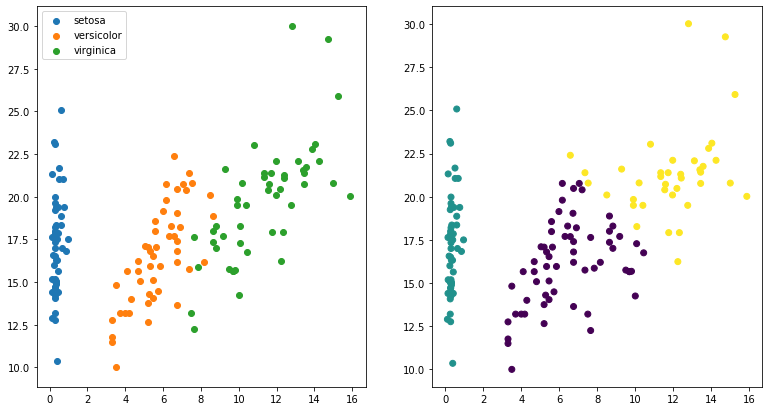

In [7]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in iris.groupby('species_name'):
    plt.scatter(subset.petal_area, subset.sepal_area, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(iris.petal_area, iris.sepal_area, c=iris.cluster)

Use the elbow method to visually select a good value for k.

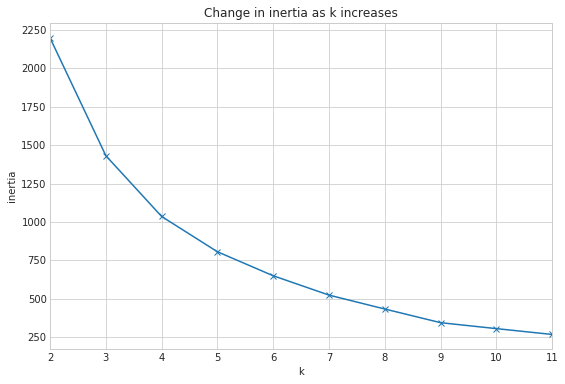

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Repeat the clustering, this time with 3 different features.

In [9]:
X = iris[['sepal_length', 'sepal_width', 'petal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
iris['cluster_3'] = kmeans.predict(X)

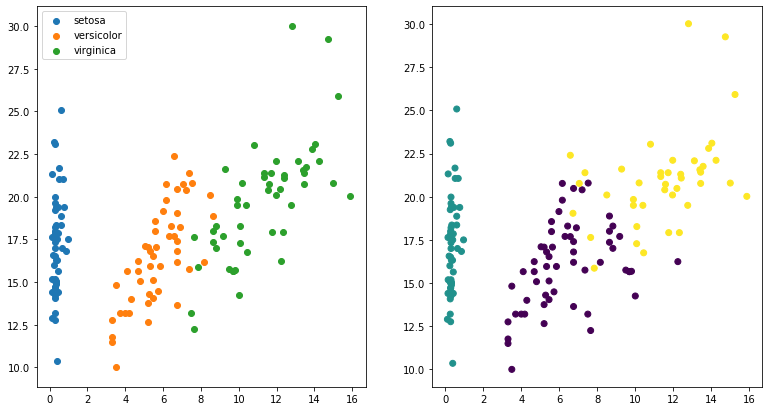

In [10]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in iris.groupby('species_name'):
    plt.scatter(subset.petal_area, subset.sepal_area, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(iris.petal_area, iris.sepal_area, c=iris.cluster_3)

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [11]:
def get_mall_data():
    sql = """
    SELECT * 
    FROM customers
    """
    url = get_db_url('mall_customers')
    return pd.read_sql(sql, url)

In [12]:
mall = get_mall_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
X = mall[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
mall['cluster'] = kmeans.predict(X)

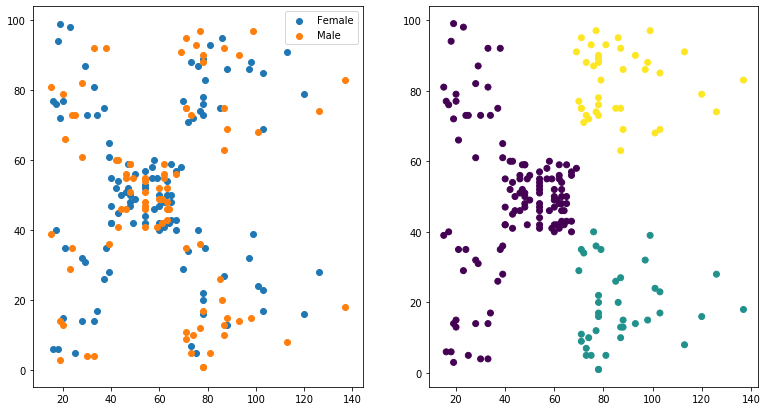

In [14]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for customer, subset in mall.groupby('gender'):
    plt.scatter(subset.annual_income, subset.spending_score, label=customer)
plt.legend()
plt.subplot(122)
plt.scatter(mall.annual_income, mall.spending_score, c=mall.cluster)

### How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [15]:
# scale the iris data
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_name']]

scaler = MinMaxScaler()
num_vars = list(X.select_dtypes('number').columns)
X[num_vars] = scaler.fit_transform(X[num_vars])
X

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


In [16]:
X_kmeans = X.drop(columns={'species_name'})
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_kmeans)
X['cluster'] = kmeans.predict(X_kmeans)

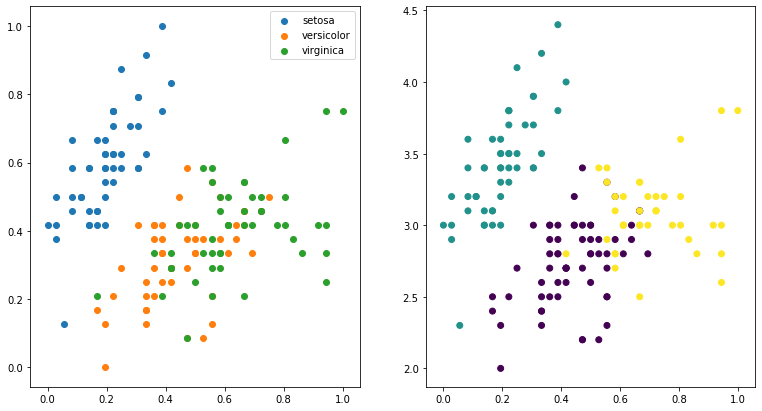

In [17]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in X.groupby('species_name'):
    plt.scatter(subset.sepal_length, subset.sepal_width, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(X.sepal_length, iris.sepal_width, c=X.cluster)

In [18]:
# Unscaled
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_name']]
X_kmeans = X.drop(columns={'species_name'})
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_kmeans)
X['cluster'] = kmeans.predict(X_kmeans)

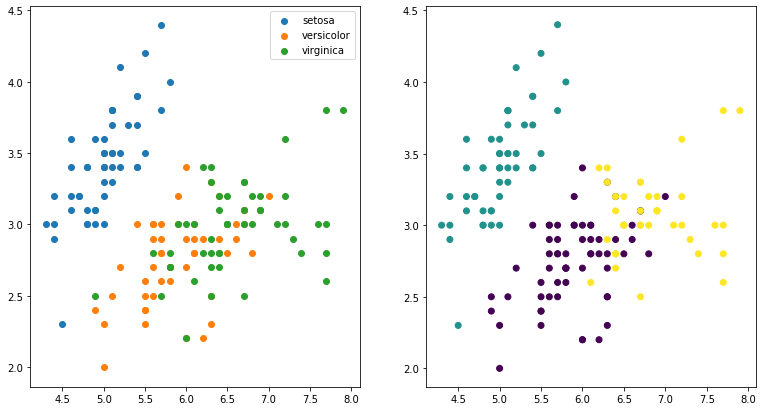

In [19]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in X.groupby('species_name'):
    plt.scatter(subset.sepal_length, subset.sepal_width, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(X.sepal_length, iris.sepal_width, c=X.cluster)

In [20]:
# Not much change from scaled to unscaled

In [21]:
# try mall data

In [22]:
# scale the mall data
X = mall[['age', 'annual_income', 'spending_score']]

scaler = MinMaxScaler()
num_vars = list(X.select_dtypes('number').columns)
X[num_vars] = scaler.fit_transform(X[num_vars])
X

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X['cluster'] = kmeans.predict(X)

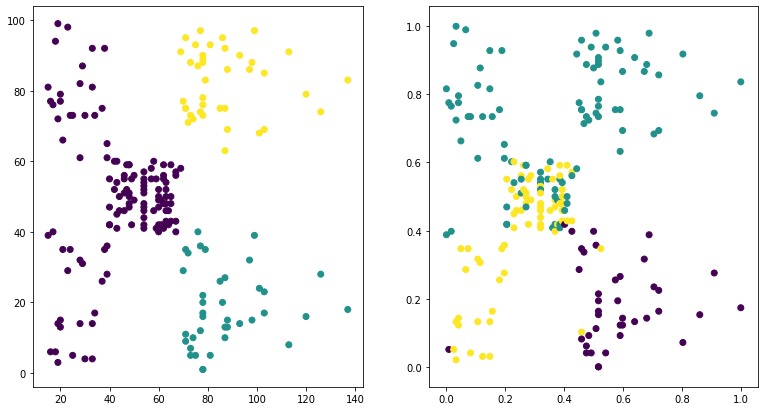

In [25]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
plt.scatter(mall.annual_income, mall.spending_score, c=mall.cluster)
plt.subplot(122)
plt.scatter(X.annual_income, X.spending_score, c=X.cluster)